# <center>Блок 4. Введение в машинное обучение<center>
## <center>ML-4. Обучение без учителя: кластеризация и техника понижения размерности<center>
### <center>1.Введение<center>
### <center>2.Введение в обучение без учителя. Базовая кластеризация<center>
#### <center>Алгоритм k-means<center>

In [1]:
# Импортируем бибилиотеку pandas для работы с датафреймами
import pandas as pd
# Импортируем seaborn для визуализации
import seaborn as sns
# Импортируем sklearn для кластеризации
from sklearn.cluster import KMeans

# Загружаем данные
df = pd.read_csv('C:\IDE\data\Block_4\pokemon.csv')
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


<Axes: xlabel='Attack', ylabel='Defense'>

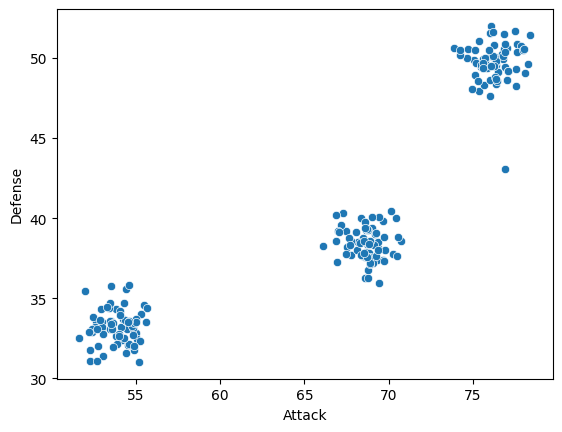

In [2]:
# Кластеризуем покемонов по их силе атаки и уровню защиты
# Сохраним в матрицу X интересующие нас признаки: атаку и защиту
X = df[['Attack', 'Defense']]

# Визуализируем
sns.scatterplot(x=df.Attack, y=df.Defense)

<Axes: xlabel='Attack', ylabel='Defense'>

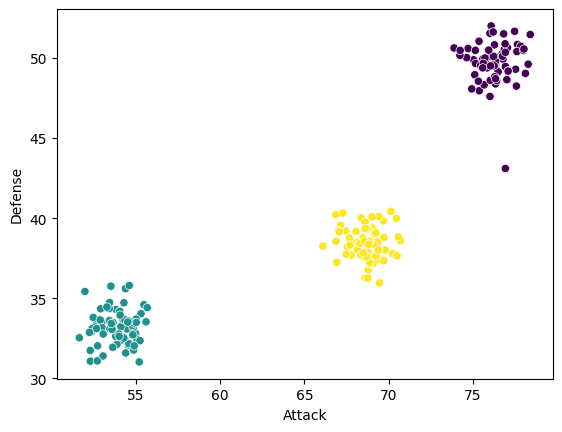

In [3]:
# Инициализируем алгоритм k-means с 3 кластерами
kmeans = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    random_state=42
)

# Обучаем модель
kmeans.fit(X)
# Предскажем кластеры
predictions = kmeans.predict(X)
# Если хотим получить метки классов, для тех же данных, на которых обучиили модель, можно запросить labels
predictions = kmeans.labels_
# Сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions

# Визуализируем результаты
sns.scatterplot(x=df.Attack, y=df.Defense, c=predictions)

<Axes: xlabel='Attack', ylabel='Defense'>

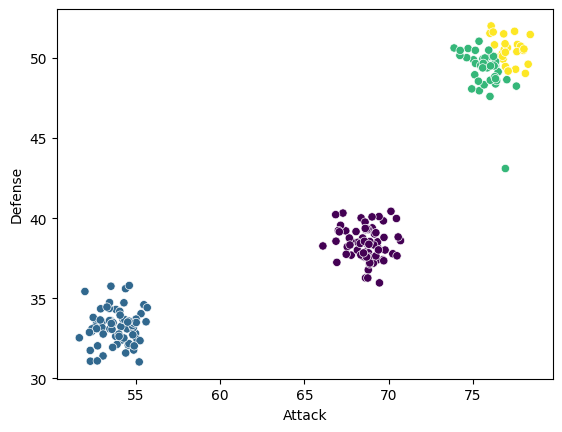

In [4]:
# Инициализируем алгоритм k-means с 3 кластерами
kmeans = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=10,
    random_state=42
)

# Обучаем модель
kmeans.fit(X)
# Предскажем кластеры
predictions = kmeans.predict(X)
# Если хотим получить метки классов, для тех же данных, на которых обучиили модель, можно запросить labels
predictions = kmeans.labels_
# Сохраним предсказания в датафрейм
df['Clusters_k4'] = predictions

# Визуализируем результаты
sns.scatterplot(x=df.Attack, y=df.Defense, c=predictions)

In [5]:
# Добавляем третий признак
X = df[['Attack', 'Defense', 'Speed']]
# Инициализируем аалгоритм k-means с 3 кластерами
kmeans = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    random_state=42
)

# Обучаем модель
kmeans.fit(X)
# Делаем предсказание
predictions = kmeans.predict(X)

#### Определение оптимального k для алгоритма k-means

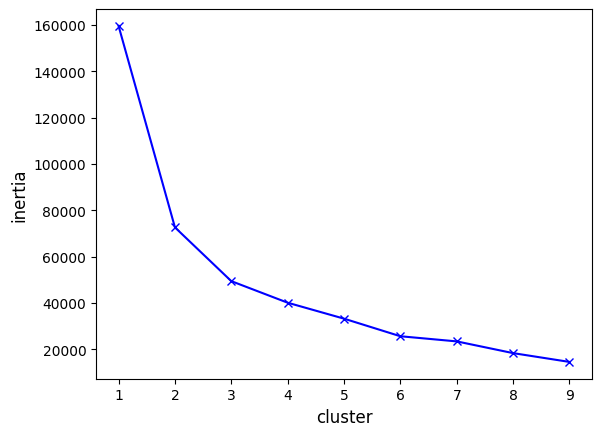

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# Функция принимает количество кластеров для k-means и матрицу с признаками и возвращает инерцию
def get_inertia(cluster_num, X):
    # Инициализируем алгоритм кластеризации
    k_means = KMeans(n_clusters=cluster_num, random_state=42)
    # Обучаем алгоритм
    k_means.fit(X)
    # Находим значение инерции
    inertia = k_means.inertia_
    # Возвращаем значение
    return inertia

# Создаем пустой список для значений инерции
inertia = []
# Итерируемся по разным размерам кластера (1 до 9) и сохраняем инерцию для каждого
for cluster_num in range(1,10):
    # Сохраняем значения
    inertia.append(get_inertia(cluster_num, X))
    
# Строим визуализацию
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
plt.plot([i for i in range(1, 10)], inertia, 'xb-')    

<Axes: xlabel='cluster', ylabel='silhouette'>

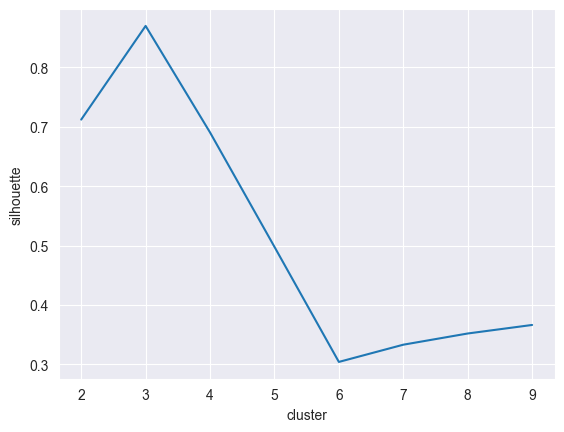

In [7]:
# Импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# Напишем функцию как при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
    # Подсчитаем метрику силуэта
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# Создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}
# Выберем нужные данные
X = df[['Attack', 'Defense']]

for cluster_num in range(2, 10):
    silhouette_res['silhouette'].append(get_silhouette(cluster_num, X))
    silhouette_res['cluster'].append(cluster_num)

# Сохраним в DataFrame значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# Визуализируем
sns.set_style('darkgrid')
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", markers='o')

<Axes: xlabel='cluster', ylabel='silhouette'>

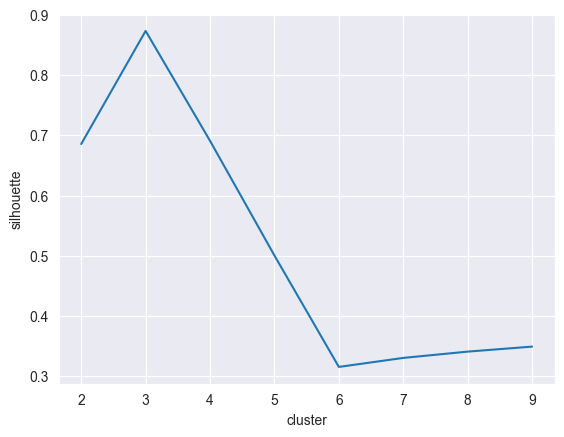

In [8]:
# Задание 2.7
data = pd.read_csv('C:\\IDE\\data\\Block_4\\values_from_the_instrument.csv')

def get_silhouette(cluster_num, data):
    kmeans = KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(data)
    silhouette = silhouette_score(data, kmeans.predict(data))
    return silhouette

silhouette_dict = {"silhouette": [], "cluster": []}

for cluster_num in range(2, 10):
    silhouette_dict['silhouette'].append(get_silhouette(cluster_num, data))
    silhouette_dict['cluster'].append(cluster_num)
    
silhouette_df = pd.DataFrame(silhouette_dict)

sns.set_style('darkgrid')
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", markers='0')

### <center>3.Метрики<center>
#### Однородность кластеров (homogeneity score)

In [9]:
# Импортируем подсчет метрики однородности классов
from sklearn.metrics.cluster import homogeneity_score

# Передаем предсказанную информацию и правильные ответы
print(homogeneity_score(labels_true=[0,0,1,1], labels_pred=[0,0,1,1]))
print(homogeneity_score(labels_true=[0,0,1,1], labels_pred=[1,1,0,0]))

1.0
1.0


In [10]:
# Передадим информацию о том, какие на самом деле должны быть кластеры и результаты предсказаний
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
1.0


#### Полнота кластера (completeness score)

In [11]:
# Импортируем метрику полноты
from sklearn.metrics.cluster import  completeness_score

# Передаем предсказанную информацию и правильные ответы, подсчитываем метрику
completeness_score(labels_true=[0,0,1,1], labels_pred=[0,0,1,1,])

1.0

In [13]:
# Подсчитаем полноту кластеров с покемонами на 3 кластерах
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
# Подсчитаем полноту кластеров с покемонами на 4 кластерах
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.8334191510029214


#### V-мера (V-measure)

In [14]:
# Импортируем подсчет v-меры
from sklearn.metrics import v_measure_score

# Подсчитаем v-меру для кластеров с покемонами
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.9091419717602737


#### Индекс Рэнда

In [15]:
# Импортируем из библиотеки sklearn подсчет индекса Рэнда
from sklearn.metrics.cluster import rand_score

# Передаем в rand_score размеченные и предсказанные данные
rand_score([0,0,1,1], [0,0,1,1])

1.0

In [16]:
# Задание 3.3
print(round(homogeneity_score(labels_true=[1, 2, 2, 1, 0], labels_pred=[1, 0, 2, 1, 2]),2))

0.74


### <center>4.Иерархическая кластеризация<center>
#### <center>Иерархическая кластеризация<center>

In [17]:
# Задание 4.1
from sklearn.cluster import AgglomerativeClustering

agglomerative_clustering = AgglomerativeClustering(n_clusters=2)
agglomerative_clustering.fit(X)
agglomerative_clustering.labels_

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

### <center>5.EM-алгоритмы кластеризации<center>